In [2]:
# adjust the directory so that we can import local source
import sys
import os

# Add the repo root to sys.path
ROOT_REL_PATH_FROM_NB = "../.."
repo_path = os.path.abspath(os.path.join(os.getcwd(), ROOT_REL_PATH_FROM_NB))  # adjust as needed
if repo_path not in sys.path:
    sys.path.insert(0, repo_path)

print(sys.path)

['/share/duchin/lab_shared/user_scrap/will/VoteKit', '/home/wlg38/.conda/envs/dndsummer/lib/python312.zip', '/home/wlg38/.conda/envs/dndsummer/lib/python3.12', '/home/wlg38/.conda/envs/dndsummer/lib/python3.12/lib-dynload', '', '/home/wlg38/.conda/envs/dndsummer/lib/python3.12/site-packages']


In [3]:
from src.votekit.ballot_generator import name_BradleyTerry 
from src.votekit.pref_interval import PreferenceInterval
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from math import factorial

In [3]:
## setup the classes
#n_cands = 5
#cands = [chr(ord('a')+i) for i in range(n_cands)] # TODO: need a better way of generating cands which allow us to go larger than 26
#print("candidates: ", cands)

cands = ["W1", "W2", "C1", "C2"]
bt = name_BradleyTerry(
    candidates=cands,
        pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.6, "W2": 0.3}),
                "C": PreferenceInterval({"C1": 0.05, "C2": 0.05}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        bloc_voter_prop={"W": 0.9, "C": 0.1 },
        cohesion_parameters={"W": {"W": 0.5, "C": 0.5}, "C": {"C": 0.9, "W": 0.1}},
    )

'''
pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.4, "W2": 0.3}),
                "C": PreferenceInterval({"C1": 0.2, "C2": 0.1}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        #bloc_voter_prop={"W": 0.7, "C": 0.3},
    '''
8

8

In [ ]:
# bug testing


### Preliminary Distribution Investigations

In [ ]:
# run BT both ways and then process the differences
num_ballots = 10000#int(10e5)
bals_BT_classic = bt.generate_profile(num_ballots)
#bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)
bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=False)
bals_BT_MCMC_shortcut = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=True)


classic: ballots_per_block={'W': 5000, 'C': 5000}
MCMC: ballots_per_block={'W': 5000, 'C': 5000}
MCMC: ballots_per_block={'W': 5000, 'C': 5000}


In [ ]:
#print(sum(bt.pdfs_by_bloc['C'].values()))
print(bt.pdfs_by_bloc)

## cheat, since above we have the same number of ballots
pdfs_BB_W = {
    "".join(list(bal)) : bt.pdfs_by_bloc["W"][bal] for bal in bt.pdfs_by_bloc["W"]
}
pdfs_BB_C = {
    "".join(list(bal)) : bt.pdfs_by_bloc["C"][bal] for bal in bt.pdfs_by_bloc["C"]
}

#pdfs_as_heights = {k : pdfs}


{'W': {('W1', 'W2', 'C1', 'C2'): 0.04309764309764311, ('W1', 'W2', 'C2', 'C1'): 0.04309764309764311, ('W1', 'C1', 'W2', 'C2'): 0.06464646464646466, ('W1', 'C1', 'C2', 'W2'): 0.09696969696969698, ('W1', 'C2', 'W2', 'C1'): 0.06464646464646466, ('W1', 'C2', 'C1', 'W2'): 0.09696969696969698, ('W2', 'W1', 'C1', 'C2'): 0.021548821548821553, ('W2', 'W1', 'C2', 'C1'): 0.021548821548821553, ('W2', 'C1', 'W1', 'C2'): 0.016161616161616165, ('W2', 'C1', 'C2', 'W1'): 0.012121212121212123, ('W2', 'C2', 'W1', 'C1'): 0.016161616161616165, ('W2', 'C2', 'C1', 'W1'): 0.012121212121212123, ('C1', 'W1', 'W2', 'C2'): 0.04848484848484849, ('C1', 'W1', 'C2', 'W2'): 0.07272727272727272, ('C1', 'W2', 'W1', 'C2'): 0.024242424242424246, ('C1', 'W2', 'C2', 'W1'): 0.01818181818181818, ('C1', 'C2', 'W1', 'W2'): 0.054545454545454536, ('C1', 'C2', 'W2', 'W1'): 0.027272727272727268, ('C2', 'W1', 'W2', 'C1'): 0.04848484848484849, ('C2', 'W1', 'C1', 'W2'): 0.07272727272727272, ('C2', 'W2', 'W1', 'C1'): 0.0242424242424242

{'W1W2C1C2': 0.04309764309764311,
 'W1W2C2C1': 0.04309764309764311,
 'W1C1W2C2': 0.06464646464646466,
 'W1C1C2W2': 0.09696969696969698,
 'W1C2W2C1': 0.06464646464646466,
 'W1C2C1W2': 0.09696969696969698,
 'W2W1C1C2': 0.021548821548821553,
 'W2W1C2C1': 0.021548821548821553,
 'W2C1W1C2': 0.016161616161616165,
 'W2C1C2W1': 0.012121212121212123,
 'W2C2W1C1': 0.016161616161616165,
 'W2C2C1W1': 0.012121212121212123,
 'C1W1W2C2': 0.04848484848484849,
 'C1W1C2W2': 0.07272727272727272,
 'C1W2W1C2': 0.024242424242424246,
 'C1W2C2W1': 0.01818181818181818,
 'C1C2W1W2': 0.054545454545454536,
 'C1C2W2W1': 0.027272727272727268,
 'C2W1W2C1': 0.04848484848484849,
 'C2W1C1W2': 0.07272727272727272,
 'C2W2W1C1': 0.024242424242424246,
 'C2W2C1W1': 0.01818181818181818,
 'C2C1W1W2': 0.054545454545454536,
 'C2C1W2W1': 0.027272727272727268}

### Visualize the frequency differences between MCMC and classic BT method

False
{'W1W2C1C2': 191, 'W1W2C2C1': 251, 'W1C2C1W2': 8, 'W1C2W2C1': 1, 'W1C1W2C2': 343, 'W1C1C2W2': 13, 'C1W2W1C2': 18, 'C1W2C2W1': 132, 'C1C2W1W2': 1071, 'C1C2W2W1': 1085, 'C1W1W2C2': 20, 'C1W1C2W2': 121, 'C2W2C1W1': 118, 'C2W2W1C1': 12, 'C2W1C1W2': 124, 'C2W1W2C1': 17, 'C2C1W1W2': 1137, 'C2C1W2W1': 1089, 'W2C2C1W1': 11, 'W2C2W1C1': 2, 'W2W1C1C2': 117, 'W2W1C2C1': 1, 'W2C1W1C2': 1, 'W2C1C2W1': 19}
['W1W2C1C2', 'W1W2C2C1', 'W1C2C1W2', 'W1C2W2C1', 'W1C1W2C2', 'W1C1C2W2', 'C1W2W1C2', 'C1W2C2W1', 'C1C2W1W2', 'C1C2W2W1', 'C1W1W2C2', 'C1W1C2W2', 'C2W2C1W1', 'C2W2W1C1', 'C2W1C1W2', 'C2W1W2C1', 'C2C1W1W2', 'C2C1W2W1', 'W2C2C1W1', 'W2C2W1C1', 'W2W1C1C2', 'W2W1C2C1', 'W2C1W1C2', 'W2C1C2W1']
['W1', 'W2', 'C1', 'C2']


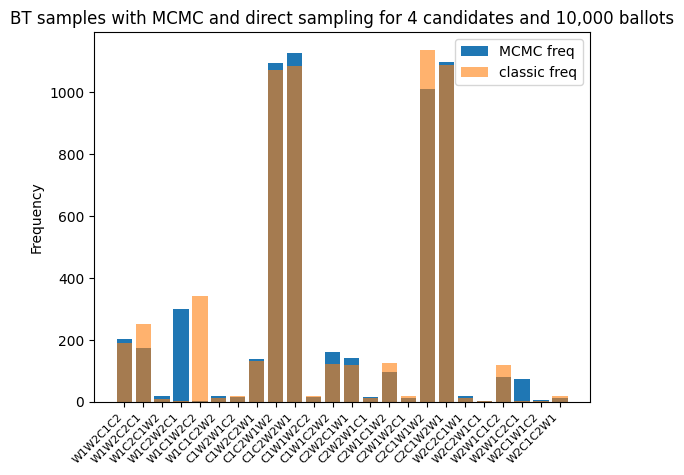

In [ ]:
ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]

ballot_rankings_MCMC_shortcut = [bal.ranking for bal in bals_BT_MCMC_shortcut.ballots]
bal_labels_MCMC_shortcut = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_shortcut]
bal_weights_MCMC_shortcut = [int(bal.weight) for bal in bals_BT_MCMC_shortcut.ballots]

ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]

print(bal_labels_classic == bal_labels_MCMC) # labels not in the same order, so set up a map 

# map ballots to weights for each method
bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i] for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i] for i in range(len(ballot_rankings_MCMC))}
bal_rankings_map_MCMC_shortcut = {bal_labels_MCMC_shortcut[i]: bal_weights_MCMC_shortcut[i] for i in range(len(ballot_rankings_MCMC_shortcut))}

# convert the bt instance pdfs to a viz-able form

print(bal_rankings_map_classic)
x_labels = list(bal_rankings_map_classic.keys())

plt.bar(x_labels, [bal_rankings_map_MCMC[k] for k in x_labels], label="MCMC freq")
#plt.bar(x_labels, [bal_rankings_map_MCMC_shortcut[k] for k in x_labels], label="MCMC shortcut freq", alpha=0.6)
plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend()
plt.ylabel("Frequency")
plt.title(f"BT samples with MCMC and direct sampling for {len(cands)} candidates and {num_ballots:,} ballots")

8
print(cands)


In [42]:
bals_BT_MCMC.ballots

(Ranking
 1.) W2, 
 2.) W1, 
 3.) C1, 
 4.) C2, 
 Weight: 9802.0,
 Ranking
 1.) W2, 
 2.) W1, 
 3.) C2, 
 4.) C1, 
 Weight: 4735.0,
 Ranking
 1.) W2, 
 2.) C1, 
 3.) W1, 
 4.) C2, 
 Weight: 4965.0,
 Ranking
 1.) W2, 
 2.) C1, 
 3.) C2, 
 4.) W1, 
 Weight: 1186.0,
 Ranking
 1.) W2, 
 2.) C2, 
 3.) C1, 
 4.) W1, 
 Weight: 568.0,
 Ranking
 1.) W2, 
 2.) C2, 
 3.) W1, 
 4.) C1, 
 Weight: 1183.0,
 Ranking
 1.) C1, 
 2.) W1, 
 3.) C2, 
 4.) W2, 
 Weight: 1529.0,
 Ranking
 1.) C1, 
 2.) W1, 
 3.) W2, 
 4.) C2, 
 Weight: 4403.0,
 Ranking
 1.) C1, 
 2.) W2, 
 3.) W1, 
 4.) C2, 
 Weight: 3310.0,
 Ranking
 1.) C1, 
 2.) W2, 
 3.) C2, 
 4.) W1, 
 Weight: 842.0,
 Ranking
 1.) C1, 
 2.) C2, 
 3.) W1, 
 4.) W2, 
 Weight: 399.0,
 Ranking
 1.) C1, 
 2.) C2, 
 3.) W2, 
 4.) W1, 
 Weight: 302.0,
 Ranking
 1.) W1, 
 2.) C1, 
 3.) C2, 
 4.) W2, 
 Weight: 3011.0,
 Ranking
 1.) W1, 
 2.) C1, 
 3.) W2, 
 4.) C2, 
 Weight: 8893.0,
 Ranking
 1.) W1, 
 2.) W2, 
 3.) C1, 
 4.) C2, 
 Weight: 13142.0,
 Ranking
 1.)

### TV Distance Empirics

In [5]:
def total_variation_distance(P, Q, labels):
    sum = 0 
    for x in labels:
        sum += abs(P[x] - Q[x])
    return (1/2)*sum

In [ ]:
# TODO: archive this cell
test_bals = bt.generate_profile(10000).group_ballots()
sum([b.weight for b in test_bals.ballots])
test_rankings = [bal.ranking for bal in test_bals.ballots]
test_bal_labels = [  "".join([list(cand)[0] for cand in ranking])  for ranking in test_rankings]
#print(bal_labels[0])
test_bal_weights = [int(bal.weight) for bal in test_bals.ballots]
#print(sum(test_bal_weights))
#print(len(test_bal_weights))


print("len set")
print(
    len(set(test_bal_labels))
)

print(sum([test_bal_weights[i] for i in range(len(test_bal_labels))]))

print(zip())

test_map = {
  test_bal_labels[i] : test_bal_weights[i] for i in range(len(test_bal_labels))  
}



print(sum(test_map.values()))

len set
24
10000
10000


In [18]:
num_ballots_array = np.linspace(100, 2000, 100)
num_ballots_array = num_ballots_array.astype(int)[1:]
num_trials_per_ballot_size = 100

N_CANDS_FOR_BALLOTS = 6
bt = name_BradleyTerry(**generate_BT_args(n_cands=N_CANDS_FOR_BALLOTS, alpha=1))

tv_distances_non_shortcut = []
tv_distances_shortcut = []
use_verbose_shortcut = True
for num_ballots in tqdm(num_ballots_array):
    running_total_non_shortcut = 0
    running_total_shortcut = 0
    for _ in range(num_trials_per_ballot_size):
        ## -- Intialize the ballots ------------ 
        bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False).group_ballots()
        bals_BT_MCMC_shortcut = bt.generate_profile_MCMC(num_ballots, verbose=use_verbose_shortcut, on_shortcut_graph=True).group_ballots() ## TODO: ON_SHORTCUT IS NOT SPECIFIED HERE
        bals_BT_classic = bt.generate_profile(num_ballots).group_ballots()

        if use_verbose_shortcut:
            use_verbose_shortcut = False

        ## -- Calculate the frequencies ----------------
        ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
        bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
        bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]

        ballot_rankings_MCMC_shortcut = [bal.ranking for bal in bals_BT_MCMC_shortcut.ballots]
        bal_labels_MCMC_shortcut = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_shortcut]
        bal_weights_MCMC_shortcut = [int(bal.weight) for bal in bals_BT_MCMC_shortcut.ballots]
        
        ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
        bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
        bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]
        
        
        bal_rankings_map_classic_as_freq = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(bal_labels_classic))}
        bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(bal_labels_MCMC))}
        bal_rankings_map_MCMC_shortcut_as_freq = {bal_labels_MCMC_shortcut[i]: bal_weights_MCMC_shortcut[i] / num_ballots for i in range(len(bal_labels_MCMC_shortcut))}

        # populate any missing keys
        # note: in general the classic map should have all the keys since
        # it computes the pdf directly. However, this procedure should
        # work in cases where we may not have the classic map
        all_keys = [list(m.keys()) for m in [
            bal_rankings_map_classic_as_freq, bal_rankings_map_MCMC, bal_rankings_map_MCMC_shortcut_as_freq
        ]]
        flattened_keys = [k for sublist in all_keys for k in sublist]

        for key in flattened_keys:
            bal_rankings_map_MCMC_shortcut_as_freq.setdefault(key, 0) 
            bal_rankings_map_MCMC.setdefault(key, 0) 
            bal_rankings_map_classic_as_freq.setdefault(key, 0) 

        # increment the recorded tv distances
        x_labels = list(bal_rankings_map_classic_as_freq.keys())
        running_total_non_shortcut += total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic_as_freq, x_labels)
        running_total_shortcut += total_variation_distance(bal_rankings_map_MCMC_shortcut_as_freq, bal_rankings_map_classic_as_freq, x_labels)

    tv_distances_non_shortcut.append(running_total_non_shortcut/num_trials_per_ballot_size)
    tv_distances_shortcut.append(running_total_shortcut/num_trials_per_ballot_size)


  0%|          | 0/99 [00:00<?, ?it/s]

Burn in time: 0
Acceptance ratio as number accepted / total steps: 0.41


100%|██████████| 99/99 [20:31<00:00, 12.43s/it]


In [9]:
tv_distances_non_shortcut


[np.float64(0.9652941176470574),
 np.float64(0.9608695652173934),
 np.float64(0.9507006369426751),
 np.float64(0.9418750000000009),
 np.float64(0.928923076923075),
 np.float64(0.9278604651162801),
 np.float64(0.9135470085470061),
 np.float64(0.9068774703557275),
 np.float64(0.9043014705882326),
 np.float64(0.896941580756012),
 np.float64(0.8906109324758806),
 np.float64(0.8858787878787865),
 np.float64(0.8704871060171907),
 np.float64(0.8691847826086946),
 np.float64(0.8680103359173137),
 np.float64(0.8650614250614255),
 np.float64(0.8565023474178395),
 np.float64(0.8429438202247213),
 np.float64(0.8377586206896609),
 np.float64(0.8415113871635667),
 np.float64(0.8259642147117303),
 np.float64(0.8289272030651389),
 np.float64(0.8252310536044424),
 np.float64(0.8204107142857116),
 np.float64(0.8164075993091555),
 np.float64(0.81060200668897),
 np.float64(0.8072653721682844),
 np.float64(0.797566718995287),
 np.float64(0.7954725609755993),
 np.float64(0.7964888888888915),
 np.float64(0.7

In [10]:
tv_distances_shortcut

[np.float64(0.967815126050419),
 np.float64(0.9675362318840597),
 np.float64(0.9599363057324841),
 np.float64(0.956250000000002),
 np.float64(0.9523589743589725),
 np.float64(0.9477209302325588),
 np.float64(0.9387606837606817),
 np.float64(0.9377865612648193),
 np.float64(0.9302573529411743),
 np.float64(0.9254639175257712),
 np.float64(0.9220900321543382),
 np.float64(0.9214545454545449),
 np.float64(0.9152148997134651),
 np.float64(0.9088315217391291),
 np.float64(0.9106718346253244),
 np.float64(0.9052334152334153),
 np.float64(0.8987089201877926),
 np.float64(0.8961797752809006),
 np.float64(0.890625000000005),
 np.float64(0.8876190476190522),
 np.float64(0.8865805168986095),
 np.float64(0.884923371647514),
 np.float64(0.8797042513863265),
 np.float64(0.8750357142857115),
 np.float64(0.8730742659758225),
 np.float64(0.8662040133779328),
 np.float64(0.8606472491909379),
 np.float64(0.861381475667187),
 np.float64(0.8574999999999909),
 np.float64(0.8550666666666684),
 np.float64(0.8

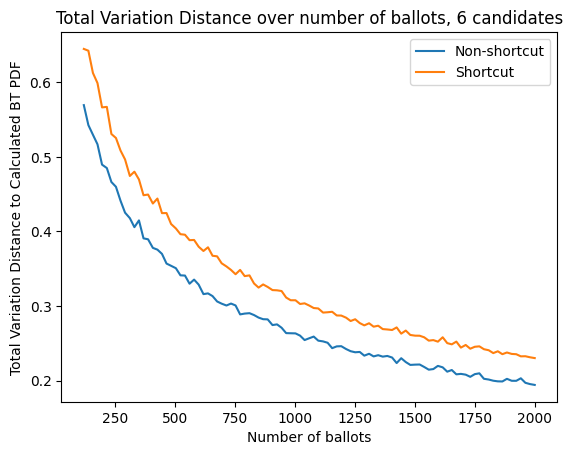

In [19]:
### Plot TV Distance as a function of ballots
plt.plot(num_ballots_array, tv_distances_non_shortcut, label="Non-shortcut")
plt.plot(num_ballots_array, tv_distances_shortcut, label="Shortcut")
plt.legend()
plt.xlabel("Number of ballots")
plt.ylabel(f"Total Variation Distance to Calculated BT PDF")
plt.title(f"Total Variation Distance over number of ballots, {N_CANDS_FOR_BALLOTS} candidates")
plt.show()

### Time investigations for BT methods

In [4]:
## run both classic and both types of MCMC runs for maybe 1k, 5k, 10k ballots with various n and see how they compare
## might be worth writing a method to generate data for $n$ candidates so that we can scale $n$ easily
def generate_BT_args(n_cands, alpha=1):
    '''
        generates arguments for name_BradleyTerry with n_cands,
        generates single slate and single bloc, 
    '''
    if n_cands == 0:
        raise Exception("cannot generate BT args for 0 candidates")

    #cands = [chr(ord('a')+i) for i in range(n_cands)] # alphabetic candidates
    cands = [f"Cand{i}" for i in range(n_cands)]
    bloc_name = "H"
    pref_interval = PreferenceInterval.from_dirichlet(candidates=cands, alpha=alpha)
    pref_intervals_by_bloc = {
        bloc_name: {
            bloc_name : pref_interval
        }
    }
    bloc_voter_prop = {bloc_name: 1}
    cohesion_paramteters = {
        bloc_name: {
            bloc_name: 1
        }
    }
    
    return {
        "candidates": cands,
        "pref_intervals_by_bloc": pref_intervals_by_bloc,
        "bloc_voter_prop" : bloc_voter_prop,
        "cohesion_parameters": cohesion_paramteters
    }


#bt_args = generate_BT_args(5, alpha=1)
#dummy_method(**bt_args)
#test_BT = name_BradleyTerry(**bt_args)

In [4]:
# 5 candidates run time sampling
bt_5_cands = name_BradleyTerry(**generate_BT_args(n_cands=5, alpha=1))
n_ballots = 5000
%timeit bt_5_cands.generate_profile(n_ballots)
%timeit bt_5_cands.generate_profile_MCMC(n_ballots)

148 ms ± 7.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
151 ms ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
# 20 candidates run time sampling
bt_20_cands = name_BradleyTerry(**generate_BT_args(n_cands=20, alpha=1))
n_ballots = 1000
# check that generate_profile actually throws an error with this many cands
%timeit bt_20_cands.generate_profile_MCMC(n_ballots)
%timeit bt_20_cands.generate_profile_MCMC(n_ballots, on_shortcut_graph=True)

/share/duchin/lab_shared/user_scrap/will/VoteKit/src/votekit/ballot_generator.py:834: UserWarning: For 12 or more candidates, exact sampling is computationally infeasible.                     Please only use the built in generate_profile_MCMC method.
  warnings.warn(


123 ms ± 3.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
60.5 ms ± 601 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
import warnings

## get the run data for MCMC on each of the methods for 1000 ballots on 
## n_cands from 5 to 500?

x_pts = [5, 7, 8, 9, 10, 25, 50, 100, 200, 300] #500]#1000]
N_BALLOTS = 500

classic_times = []
mcmc_times = [-1 for _ in x_pts]
mcmc_shortcut_times = [-1 for _ in x_pts]

warnings.filterwarnings("ignore")

for i in tqdm(range(len(x_pts))):
    n_cands_i = x_pts[i]
    i_bt = name_BradleyTerry(**generate_BT_args(n_cands=n_cands_i, alpha=1))
    if n_cands_i < 11:
        time_classic = %timeit -o -q -n 50 -r 2 i_bt.generate_profile(N_BALLOTS)
        classic_times.append(time_classic.average)
    else:
        classic_times.append(np.inf)
        

    time_mcmc = %timeit -o -q -n 50 -r 2 i_bt.generate_profile_MCMC(N_BALLOTS)
    time_mcmc_shortcut = %timeit -o -q -n 50 -r 2 i_bt.generate_profile_MCMC(N_BALLOTS, on_shortcut_graph=True)
    mcmc_times[i] = time_mcmc.average
    mcmc_shortcut_times[i] = time_mcmc_shortcut.average

print(classic_times)
print(mcmc_times)
print(mcmc_shortcut_times)

warnings.resetwarnings()

100%|██████████| 10/10 [08:47<00:00, 52.79s/it] 

[0.011225306729320437, 0.02791134972125292, 0.03719051969237626, 0.09136190004181116, 0.5539640819211491, inf, inf, inf, inf, inf]
[0.010666746930219233, 0.021374948520679025, 0.025821206788532437, 0.03431070906110108, 0.0365465975808911, 0.0819666924374178, 0.1559144895616919, 0.3110901171597652, 0.6605228476109914, 1.100717277182266]
[0.011947826428804547, 0.0201244416506961, 0.020486473508644847, 0.028678471830207854, 0.026834310539998116, 0.04498846394941211, 0.08595817174762488, 0.1890019765123725, 0.5010105966613628, 1.0661866073007695]


[0.013206034959293903, 0.4999710919475183, nan, nan, nan, nan]


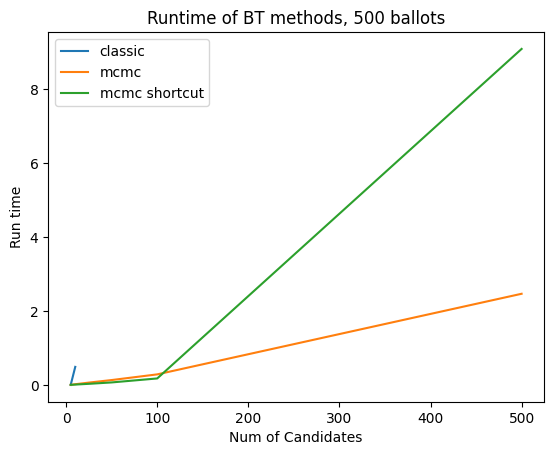

In [ ]:
# pre-process classic data
#x_pts_classic = x_pts[:len(classic_times)]
#classic_times += [np.nan] * (len(x_pts) - len(classic_times))

x_pts1 = [5, 10, 25, 50, 100, 500]
classic_times1 = [0.013206034959293903, 0.4999710919475183]
mcmc_times1 = [0.012214414309710264, 0.031206386440899223, 0.0752692412910983, 0.14400208410108462, 0.29741015953943134, 2.475761181199923]
mcmc_shortcut_times1 = [0.014953425631392746, 0.021603763019666076, 0.04186960987048223, 0.07963796699186787, 0.18723004976753144, 9.093054093399552]

print(classic_times1)
plt.plot(x_pts1, classic_times1, label="classic")
plt.plot(x_pts1, mcmc_times1, label="mcmc")
plt.plot(x_pts1, mcmc_shortcut_times1, label="mcmc shortcut")
plt.xlabel("Num of Candidates")
plt.ylabel("Run time (s)")
plt.title(f"Runtime of BT methods, {N_BALLOTS} ballots")
plt.legend()


[0.011225306729320437, 0.02791134972125292, 0.03719051969237626, 0.09136190004181116, 0.5539640819211491, inf, inf, inf, inf, inf]


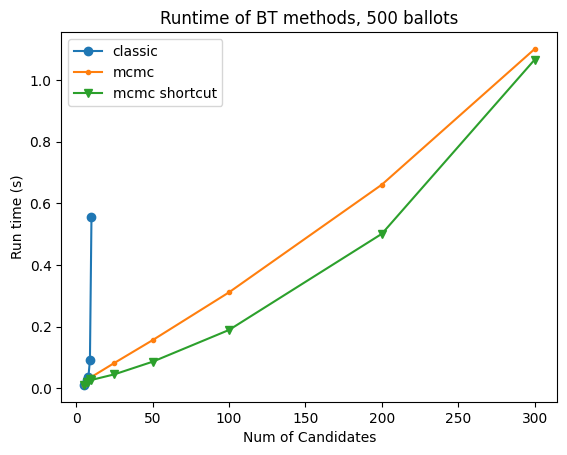

In [11]:
#x_pts.pop(-1)
classic_times.pop(-1)
mcmc_times.pop(-1)
mcmc_shortcut_times.pop(-1)

print(classic_times)
plt.plot(x_pts, classic_times, label="classic", marker="o")
plt.plot(x_pts, mcmc_times, label="mcmc", marker=".")
plt.plot(x_pts, mcmc_shortcut_times, label="mcmc shortcut", marker="v")
plt.xlabel("Num of Candidates")
plt.ylabel("Run time (s)")
plt.title(f"Runtime of BT methods, {N_BALLOTS} ballots")
plt.legend()

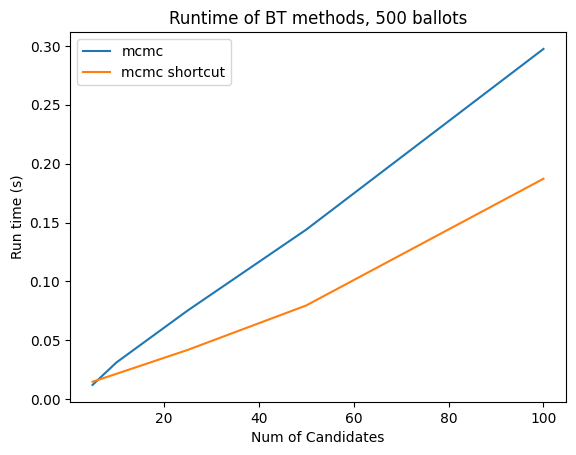

In [19]:
#print(classic_times)
truncated_x_pts = x_pts[:-1]
#plt.plot(truncated_x_pts, classic_times[:-1], label="classic")
plt.plot(truncated_x_pts, mcmc_times[:-1], label="mcmc")
plt.plot(truncated_x_pts, mcmc_shortcut_times[:-1], label="mcmc shortcut")
plt.xlabel("Num of Candidates")
plt.ylabel("Run time (s)")
plt.title(f"Runtime of BT methods, {N_BALLOTS} ballots")
plt.legend()


In [21]:
# get the tv distance over cands

cands_range = range(2, 11)
num_trials_per_cand = 100
NUM_BALLOTS = 1000

tv_distances_non_shortcut = []
tv_distances_shortcut = []
for num_cands in tqdm(cands_range):
    running_total_non_shortcut = 0
    running_total_shortcut = 0
    for _ in range(num_trials_per_cand):
        bt = name_BradleyTerry(**generate_BT_args(n_cands=num_cands, alpha=1))
        ## -- Intialize the ballots ------------ 
        bals_BT_MCMC = bt.generate_profile_MCMC(NUM_BALLOTS, verbose=False).group_ballots()
        bals_BT_MCMC_shortcut = bt.generate_profile_MCMC(NUM_BALLOTS, verbose=False, on_shortcut_graph=True).group_ballots() ## TODO: ON_SHORTCUT IS NOT SPECIFIED HERE
        bals_BT_classic = bt.generate_profile(NUM_BALLOTS).group_ballots()
        
        ## -- Calculate the frequencies ----------------
        ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
        bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
        bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]

        ballot_rankings_MCMC_shortcut = [bal.ranking for bal in bals_BT_MCMC_shortcut.ballots]
        bal_labels_MCMC_shortcut = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_shortcut]
        bal_weights_MCMC_shortcut = [int(bal.weight) for bal in bals_BT_MCMC_shortcut.ballots]
        
        ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
        bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
        bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]
        
        
        bal_rankings_map_classic_as_freq = {bal_labels_classic[i]: bal_weights_classic[i]/NUM_BALLOTS for i in range(len(bal_labels_classic))}
        bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/NUM_BALLOTS for i in range(len(bal_labels_MCMC))}
        bal_rankings_map_MCMC_shortcut_as_freq = {bal_labels_MCMC_shortcut[i]: bal_weights_MCMC_shortcut[i] / NUM_BALLOTS for i in range(len(bal_labels_MCMC_shortcut))}

        # populate any missing keys
        # note: in general the classic map should have all the keys since
        # it computes the pdf directly. However, this procedure should
        # work in cases where we may not have the classic map
        all_keys = [list(m.keys()) for m in [
            bal_rankings_map_classic_as_freq, bal_rankings_map_MCMC, bal_rankings_map_MCMC_shortcut_as_freq
        ]]
        flattened_keys = [k for sublist in all_keys for k in sublist]
        for key in flattened_keys:
            bal_rankings_map_MCMC_shortcut_as_freq.setdefault(key, 0) 
            bal_rankings_map_MCMC.setdefault(key, 0) 
            bal_rankings_map_classic_as_freq.setdefault(key, 0) 

        # increment the recorded tv distances
        x_labels = list(bal_rankings_map_classic_as_freq.keys())
        running_total_non_shortcut += total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic_as_freq, x_labels)
        running_total_shortcut += total_variation_distance(bal_rankings_map_MCMC_shortcut_as_freq, bal_rankings_map_classic_as_freq, x_labels)

    tv_distances_non_shortcut.append(running_total_non_shortcut/num_trials_per_cand)
    tv_distances_shortcut.append(running_total_shortcut/num_trials_per_cand)



100%|██████████| 9/9 [20:32<00:00, 136.99s/it]


In [ ]:
### Plot TV Distance as a function of cands
plt.plot(cands_range, tv_distances_non_shortcut, label="Non-shortcut", marker="o")
plt.plot(cands_range, tv_distances_shortcut, label="Shortcut", marker="v")
plt.legend()
plt.xlabel("Number of candidates")
plt.ylabel("Total Variation Distance to Calculated BT PDF")
plt.title(f"Total Variation Distance over number of cands, {NUM_BALLOTS} ballots")
plt.show()

print(tv_distances_non_shortcut[-1])

NameError: name 'cands_range' is not defined

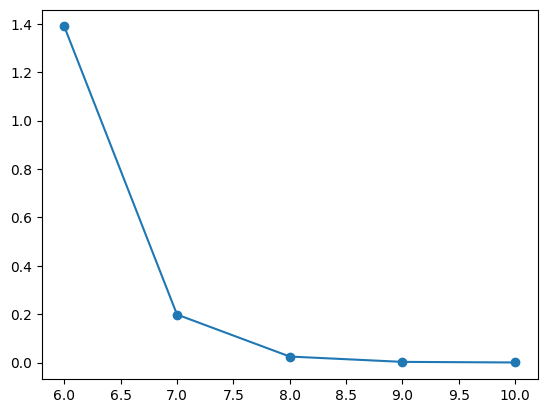

0.0002755731922398589
0.002755731922398589


In [37]:
x_group_size = range(6, 11)
group_size = [1000/factorial(x) for x in x_group_size]
plt.plot(x_group_size, group_size, marker="o")
plt.show()
print(group_size[-1])
print(group_size[-2])

### Get memory usage stats for each method

In [9]:
import tracemalloc

cands_for_memory = range(2,4) #range(2, 11)
N_BALLOTS_MEM = 500
memory_classic = []
memory_MCMC = []
memory_MCMC_shortcut = []
N_TRIALS_MEM = 50

tracemalloc.start()
for n_cands in tqdm(cands_for_memory):
    total_classic = 0
    total_MCMC = 0
    total_MCMC_shortcut = 0
    for _ in range(N_TRIALS_MEM):
        bt_mem = name_BradleyTerry(**generate_BT_args(n_cands=n_cands, alpha=1))    

        prof1 = bt_mem.generate_profile(number_of_ballots=N_BALLOTS_MEM)
        mem_data = tracemalloc.get_traced_memory()
        total_classic += (mem_data[1] - mem_data[0])
        tracemalloc.reset_peak()

        prof2 = bt_mem.generate_profile_MCMC(number_of_ballots=N_BALLOTS_MEM, on_shortcut_graph=False)
        mcmc_data = tracemalloc.get_traced_memory()
        total_MCMC += (mcmc_data[1] - mcmc_data[0])
        tracemalloc.reset_peak()

        prof3 = bt_mem.generate_profile_MCMC(number_of_ballots=N_BALLOTS_MEM, on_shortcut_graph=True)
        mcmc_shortcut_data = tracemalloc.get_traced_memory()
        total_MCMC_shortcut += (mcmc_shortcut_data[1] - mcmc_shortcut_data[0])
        tracemalloc.reset_peak()
    memory_classic.append(total_classic/N_TRIALS_MEM)
    memory_MCMC.append(total_MCMC/N_TRIALS_MEM)
    memory_MCMC_shortcut.append(total_MCMC_shortcut/N_TRIALS_MEM)

tracemalloc.stop()

bytes_to_mb = 1/(1000000)
memory_classic = [peak*bytes_to_mb for peak in memory_classic]
memory_MCMC = [peak*bytes_to_mb for peak in memory_MCMC]
memory_MCMC_shortcut = [peak*bytes_to_mb for peak in memory_MCMC_shortcut]
print(memory_classic)
print(memory_MCMC)
print(memory_MCMC_shortcut)

100%|██████████| 2/2 [00:14<00:00,  7.03s/it]

[0.5235272, 0.64745264]
[0.5147474799999999, 0.63841662]
[0.51487996, 0.63850812]


In [ ]:
# convert memory lists to memory differences

Text(0.5, 1.0, 'Memory usage over num candidates, 500 ballots')

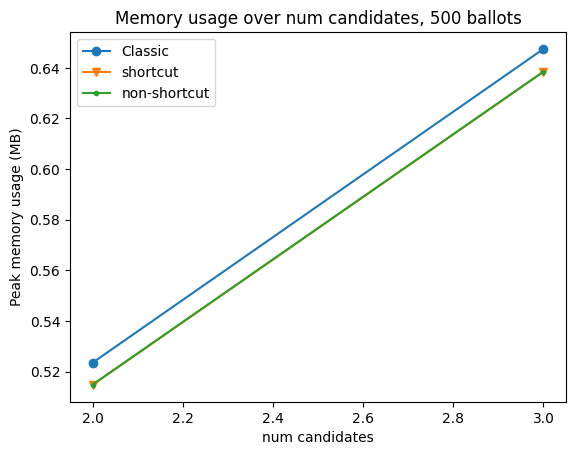

In [10]:
plt.plot(cands_for_memory, memory_classic, label="Classic", marker="o")
plt.plot(cands_for_memory, memory_MCMC, label="shortcut", marker="v")
plt.plot(cands_for_memory, memory_MCMC_shortcut, label="non-shortcut", marker=".")
plt.xlabel("num candidates")
plt.ylabel("Peak memory usage (MB)")
plt.legend()
plt.title(f"Memory usage over num candidates, {N_BALLOTS_MEM} ballots")
